# Analysis of the Experiments

In this notebook we analyse the result of the experiments.

In [378]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [379]:
df = pd.read_csv("results.csv")
df.head()
df['Number of Clients'] = df['Number of Clients'].replace(0, 'Sequential')

In [380]:
df_vec = df[df['Experiment'] == 'Vec']
df_pri = df[df['Experiment'] == 'Primes']

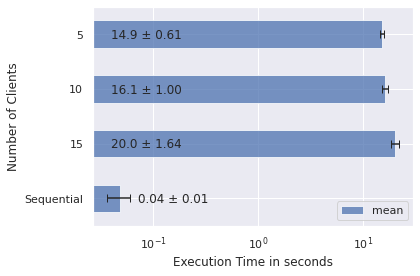

In [381]:
df1 = df_vec[df_vec['Chunk Size'] < 2].groupby('Number of Clients')['Execution Time'].agg([np.std, np.mean])
ax = df1[::-1].plot.barh(ylabel="", xerr="std", alpha=0.75, capsize=4, logx=True)
for index, value in enumerate(df1[::-1]["mean"]):
  if value < 1:
    plt.text(value + df1[::-1].iloc[index]['std']*2, index-0.08, f"{str(value)[:4]} ± {str(df1[::-1].iloc[index]['std'])[:4]}")
  else:
    plt.text(0.04, index-0.08, f"{str(value)[:4]} ± {str(df1[::-1].iloc[index]['std'])[:4]}")

# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
d = ax.set_xlabel('Execution Time in seconds')
plt.tight_layout()
plt.savefig("Vec_low_chunk_size.png", dpi=300)

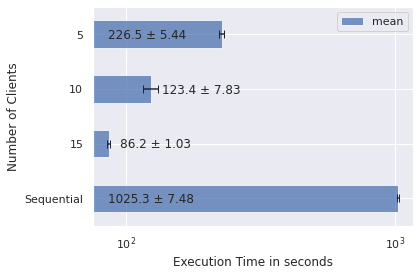

In [382]:
df1 = df_pri[df_pri['Chunk Size'] < 2].groupby('Number of Clients')['Execution Time'].agg([np.std, np.mean])
ax = df1[::-1].plot.barh(ylabel="", xerr="std", alpha=0.75, capsize=4, logx=True)
for index, value in enumerate(df1[::-1]["mean"]):
  if value < 225:
    plt.text(value + df1[::-1].iloc[index]['mean']/10, index-0.08, f"{str(value)[:6]} ± {str(df1[::-1].iloc[index]['std'])[:4]}")
  else:
    plt.text(86, index-0.08, f"{str(value)[:6]} ± {str(df1[::-1].iloc[index]['std'])[:4]}")
    
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")
d = ax.set_xlabel('Execution Time in seconds')
plt.tight_layout()
plt.savefig("Primes_low_chunk_size.png", dpi=300)

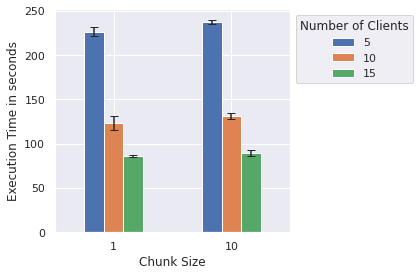

In [383]:
df1 = df_pri[df_pri['Chunk Size'] > 0].groupby(['Number of Clients', 'Chunk Size'])['Execution Time'].agg([np.std, np.mean]).unstack(0)

ax = df1.plot.bar(y='mean', capsize=4, yerr="std", rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title='Number of Clients')
ax.set_ylabel("Execution Time in seconds")
plt.tight_layout()
plt.savefig("Primes_chunk_size.png", dpi=300)

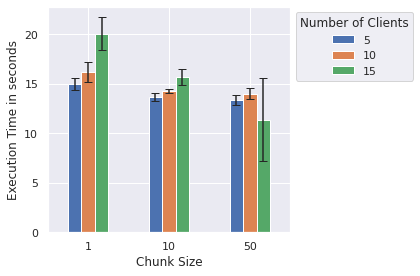

In [384]:
df1 = df_vec[df_vec['Chunk Size'] > 0].groupby(['Number of Clients', 'Chunk Size'])['Execution Time'].agg([np.std, np.mean]).unstack(0)

ax = df1.plot.bar(y='mean', capsize=4, yerr="std", rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title='Number of Clients')
ax.set_ylabel("Execution Time in seconds")
plt.tight_layout()
plt.savefig("Vec_chunk_size.png", dpi=300)